# Bank Marketing Result Prediction 

This is a binary classification task to predict whether a customer will subscribe for a term deposit or not.

* The CRISP-DM system was used in this exercise.

1. Business Understanding - The objective of the exercise is to predict product uptake by customers (a term deposit or not) depending on factors presented.
2. Data Understanding - The data provided is in a csv file containing direct marketing campaigns of thr bank customers. Exploratory analysis will be carried out in the notebook below
3. Data Preparation - There are no null values in the dataset
4. Modelling - 4 models will be evaluated for this classification task: logistic regression, random forest, k-nearest neighbors, decision tree. Training and test data was split 70:30.
5. Evaluation - Each of the 4 models will be compared and evaluated
6. Deployment - This was not within the scope of this exercise

In [1]:
#import python libraries for data manipulation and visualization
import pandas as pd
import numpy as np

#import other libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# Data Inspection

* Load the data set
* Within a markdown cell, give a description of the dataset:
    * what is the source of the data?
    * how many rows and columns?
    * does it have missing values?
    * any other significant details

In [2]:
# load the data
#the semi-colon is specified in separator because the data file uses semi-colons for delimiters
data = pd.read_csv('bank.csv',sep=';', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
3,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
4,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


In [3]:
data.tail()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
4517,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,no
4518,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,no
4519,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,no
4520,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,no
4521,44,entrepreneur,single,tertiary,no,1136,yes,yes,cellular,3,apr,345,2,249,7,other,no


In [4]:
#It is best practice to make a copy of the original Dataframe for reference purpose since changes will be made during cleaning.

data1 = data.copy()

#### Source of data:
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be (or not) subscribed. Citation: [Moro et al., 2011]


#### Input variables:
 - Bank client data:
 
 1. age (numeric)
 2. job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
    "blue-collar","self-employed","retired","technician","services") 
 3. marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
 4. education (categorical: "unknown","secondary","primary","tertiary")
 5. default: has credit in default? (binary: "yes","no")
 6. balance: average yearly balance, in euros (numeric) 
 7. housing: has housing loan? (binary: "yes","no")
 8. loan: has personal loan? (binary: "yes","no")
   
 - Related with the last contact of the current campaign:
 9. contact: contact communication type (categorical: "unknown","telephone","cellular") 
 10. day: last contact day of the month (numeric)
 11. month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
 12. duration: last contact duration, in seconds (numeric)
 
 - other attributes:
 13. campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
 14. pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
 15. previous: number of contacts performed before this campaign and for this client (numeric)
 16. poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

 - Output variable (desired target):
 17. y - has the client subscribed a term deposit? (binary: "yes","no")

- Missing Attribute Values: None



In [5]:
#inspect the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4522 entries, 0 to 4521
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       4522 non-null   object
 1   1       4522 non-null   object
 2   2       4522 non-null   object
 3   3       4522 non-null   object
 4   4       4522 non-null   object
 5   5       4522 non-null   object
 6   6       4522 non-null   object
 7   7       4522 non-null   object
 8   8       4522 non-null   object
 9   9       4522 non-null   object
 10  10      4522 non-null   object
 11  11      4522 non-null   object
 12  12      4522 non-null   object
 13  13      4522 non-null   object
 14  14      4522 non-null   object
 15  15      4522 non-null   object
 16  16      4522 non-null   object
dtypes: object(17)
memory usage: 600.7+ KB


In [6]:
# Statistical analysis
data.describe()   # Since the values' dtype are object, it only returns count, unique, top and frequency count.


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,4522,4522,4522,4522,4522,4522,4522,4522,4522,4522,4522,4522,4522,4522,4522,4522,4522
unique,68,13,4,5,3,2354,3,3,4,32,13,876,33,293,25,5,3
top,34,management,married,secondary,no,0,yes,no,cellular,20,may,123,1,-1,0,unknown,no
freq,231,969,2797,2306,4445,357,2559,3830,2896,257,1398,27,1734,3705,3705,3705,4000


In [7]:
# Number of Rows and Columns
data.shape

(4522, 17)

In [8]:
# Checking for missing values
data.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
dtype: int64

# Data Cleansing

Data cleaning steps taken include:
* Handling dataframe heading
* Removing or deleting unnecessary records
* Changing of Dtype of numeric columns

In [9]:
#set values in the first row as columns to the data frame
data.rename(columns = data.iloc[0],inplace=True)
data.head(2)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no


In [10]:
#delete the first row 
data.drop(0,inplace=True)
data.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no


In [11]:
# Rename the "y" column to Subscribed
data['subscribed']= data['y'].replace("y", "subscribed")

data.drop('y', axis=1,inplace=True)

In [12]:
# Change numeric columns from object to integers

data['age'] = data['age'].astype(int)
data['balance'] = data['balance'].astype(int)
data['campaign'] = data['campaign'].astype(int)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 1 to 4521
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         4521 non-null   int32 
 1   job         4521 non-null   object
 2   marital     4521 non-null   object
 3   education   4521 non-null   object
 4   default     4521 non-null   object
 5   balance     4521 non-null   int32 
 6   housing     4521 non-null   object
 7   loan        4521 non-null   object
 8   contact     4521 non-null   object
 9   day         4521 non-null   object
 10  month       4521 non-null   object
 11  duration    4521 non-null   object
 12  campaign    4521 non-null   int32 
 13  pdays       4521 non-null   object
 14  previous    4521 non-null   object
 15  poutcome    4521 non-null   object
 16  subscribed  4521 non-null   object
dtypes: int32(3), object(14)
memory usage: 547.6+ KB


In [14]:
# recheck data frame shape and describe() after cleaning
data.shape


(4521, 17)

In [15]:
data.describe() 

,age,balance,campaign
count,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,2.793630
std,10.576211,3009.638142,3.109807
min,19.000000,-3313.000000,1.000000
25%,33.000000,69.000000,1.000000
50%,39.000000,444.000000,2.000000
75%,49.000000,1480.000000,3.000000
max,87.000000,71188.000000,50.000000


# Data Visualization

Visualization of the relationships in the data set.

## Univariate Analysis

Charts with only one variable (column) at a time. 



In [16]:
# For proper visualization of the numeric values like age and balance, a new column for grouping will be created.

<AxesSubplot:title={'center':'Customer Age group'}, xlabel='age_group', ylabel='Count'>

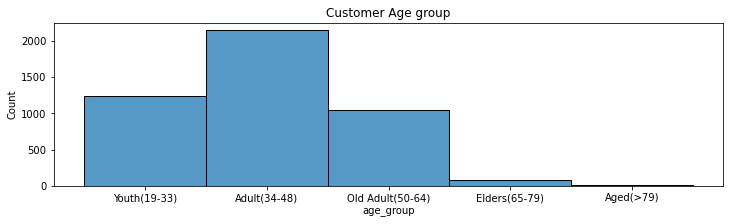

In [17]:
# Creating new column

# Age

# create a function that categorises customer age
def age_bracket(age):
    if age <= 33:
        return "Youth(19-33)"
    elif age <=48:
        return "Adult(34-48)"
    elif age <=64:
        return "Old Adult(50-64)"
    elif age <= 79:
        return "Elders(65-79)"
    else: 
        return "Aged(>79)"

    
# Create a new column for age category
data["age_group"] = data["age"].apply(age_bracket)

#Create visualization for age using age_group column
plt.figure(figsize = (12,3))
plt.title('Customer Age group')
sns.histplot(x = "age_group", data = data)


Most interviewed Customers were between age 34 & 48 (Adult)

In [18]:
# Balance

# create a function that categorises customer age
def balance_bracket(balance):
    if balance <= 15000:
        return "<15k"
    elif balance <=30000:
        return "<=30k"
    elif balance <=50000:
        return "<50k"
    elif balance <= 75000:
        return "75k"
    else: 
        return ">75k)"

    
# Create a new column for age category
data["balance_group"] = data["balance"].apply(balance_bracket)
data.head(2)


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed,age_group,balance_group
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Youth(19-33),<15k
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Youth(19-33),<15k


<AxesSubplot:title={'center':'Customer Job type'}, xlabel='job', ylabel='count'>

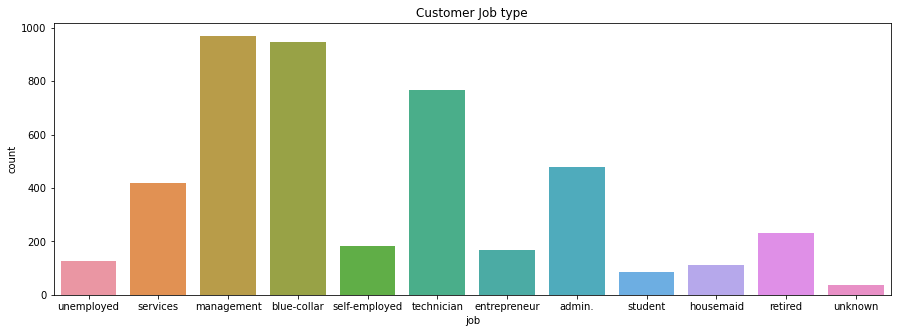

In [19]:
#Create visualization for Job
plt.figure(figsize = (15,5))
plt.title('Customer Job type')
sns.countplot(x = "job", data = data)

Higher Percentage of interviewed Customers worked in the management category

<AxesSubplot:title={'center':'Campaign Result'}, xlabel='campaign', ylabel='Count'>

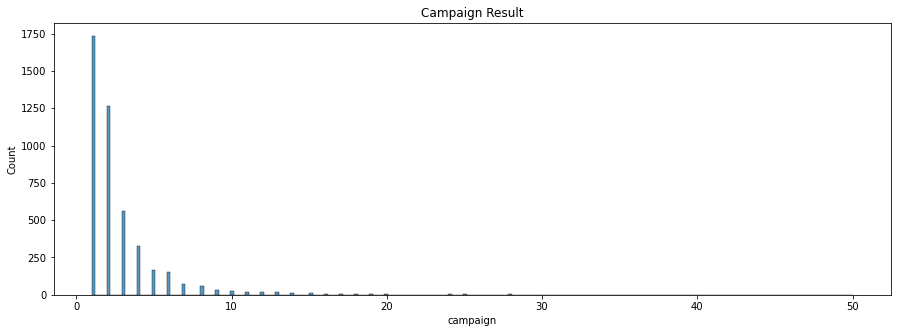

In [20]:
#Create visualization for campaign
plt.figure(figsize = (15,5))
plt.title('Campaign Result')
sns.histplot(x = "campaign", data = data)

<AxesSubplot:xlabel='balance_group', ylabel='Count'>

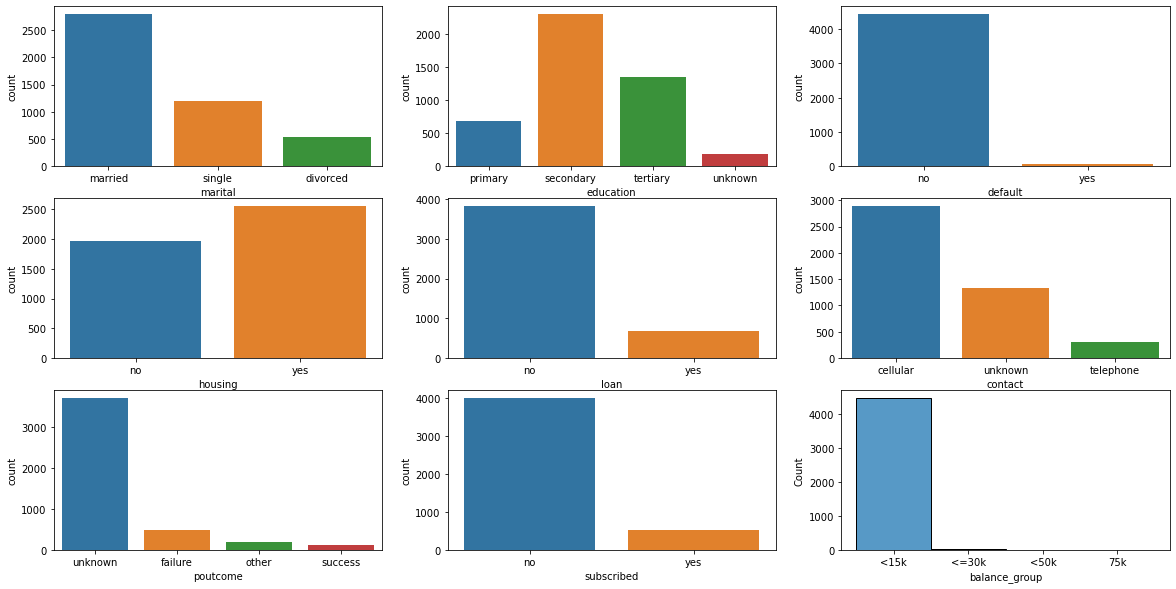

In [21]:
# For other Univariate Analysis, we will create a subplot

#Categorical data - Bar
fig, axes = plt.subplots(3, 3, figsize = (20,10))
sns.countplot(x="marital", data=data, ax=axes[0,0])
sns.countplot(x="education", data=data, ax=axes[0,1])
sns.countplot(x="default", data=data, ax=axes[0,2])
sns.countplot(x="housing", data=data, ax=axes[1,0])
sns.countplot(x="loan", data=data, ax=axes[1,1])
sns.countplot(x="contact", data=data, ax=axes[1,2])
sns.countplot(x="poutcome", data=data, ax=axes[2,0])
sns.countplot(x="subscribed", data=data, ax=axes[2,1])

# Numerical Data _ Histogram
sns.histplot(x="balance_group", data = data, ax=axes[2,2])


- Marital: More Married Customers were interviewed for this campaign
- Education: Most interviewed Customers were at Secondary education level
- Default: About 95% of interviewed Customers doesn't have credit in default
- Housing: Higher number of the interviewed Customers took house loans (About 55%)
- Loan: Most interviewed Customers does not have personal loan
- Contact: Higher percentage of the interviewed Customers used cellular contact
- POutcome: Result from the previous marketing survey was not productive, as about 75% of the result was unknown
- Balance: Most interviewed Customers had balance <15000

Text(0.5, 1.0, 'Subscribed')

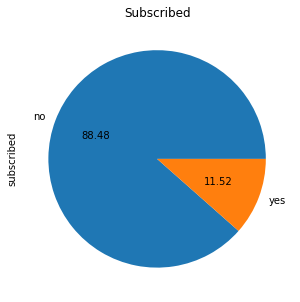

In [22]:
#Create visualization for campaign
plt.figure(figsize=(10,5))
data['subscribed'].value_counts(normalize=True).plot.pie(autopct="%.2f")
plt.title('Subscribed')


About 88% of interviewed Customers didn't subscribe to the term deposit

## Bivariate Analysis

Charts with only two variables at a time.



<AxesSubplot:title={'center':'Subscribed by Age'}, xlabel='age_group', ylabel='count'>

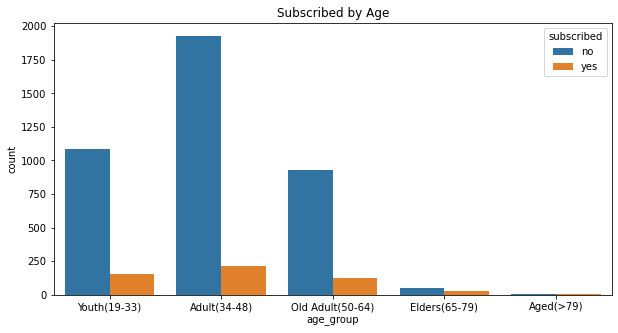

In [23]:
#Subscribed by Age

plt.figure(figsize = (10,5))
plt.title('Subscribed by Age')
sns.countplot(x = "age_group", data = data, hue = "subscribed")


Highest number of customers that subscribed are between age 34 & 48 (Adults), also Highest number of customers that did not subscribe are between age 34 & 48 

<AxesSubplot:title={'center':'Subscribed by Job category'}, xlabel='job', ylabel='count'>

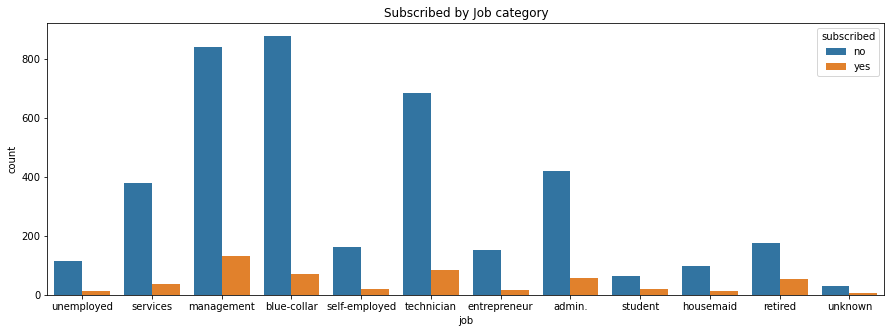

In [24]:
#Subscribed by Job type

plt.figure(figsize = (15,5))
plt.title('Subscribed by Job category')
sns.countplot(x = "job", data = data, hue = "subscribed")



Highest number of customers that subscribed are under the management job category, also Highest number of customers that did not subscribe are under the blue_collar job category

<AxesSubplot:title={'center':'Subscribed by Balance'}, xlabel='balance_group', ylabel='count'>

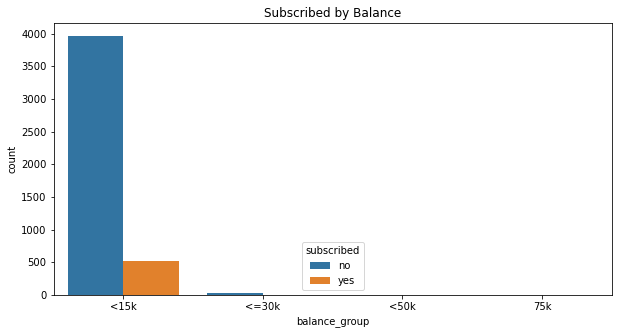

In [25]:
#Subscribed by Age

plt.figure(figsize = (10,5))
plt.title('Subscribed by Balance')
sns.countplot(x = "balance_group", data = data, hue = "subscribed")


Since most of the interviewed customers'  balance was >=15000, 10% of them subscribed to the term deposit

<AxesSubplot:title={'center':'Subscribed by Education'}, xlabel='education', ylabel='count'>

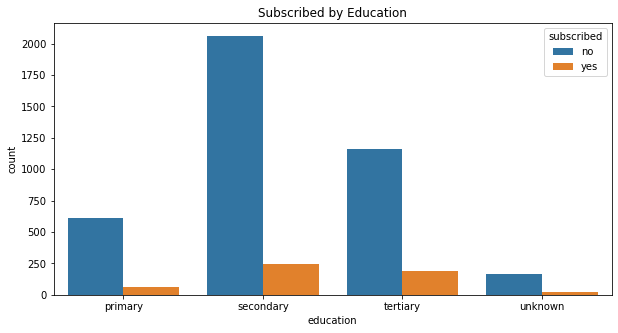

In [26]:
#Subscribed by education

plt.figure(figsize = (10,5))
plt.title('Subscribed by Education')
sns.countplot(x = "education", data = data, hue = "subscribed")

Secondary education level customers subscribed most compared to other education level, also, they had the highest level of no-subscription

<AxesSubplot:title={'center':'Subscribed by Marital Status'}, xlabel='marital', ylabel='count'>

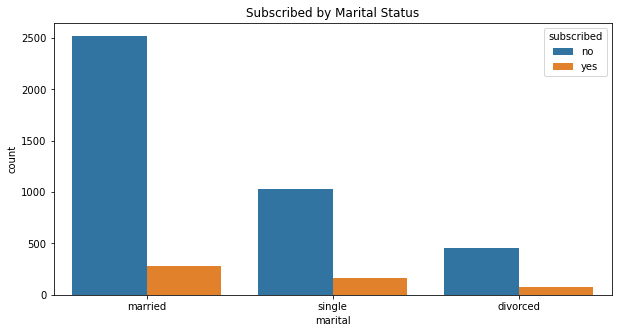

In [27]:
#Subscribed by Martial Status

plt.figure(figsize = (10,5))
plt.title('Subscribed by Marital Status')
sns.countplot(x = "marital", data = data, hue = "subscribed")

Married customers subscribed most compared to single and divorced customer, also, they had the highest level of no-subscription

<AxesSubplot:title={'center':'Subscribed by Loan'}, xlabel='loan', ylabel='count'>

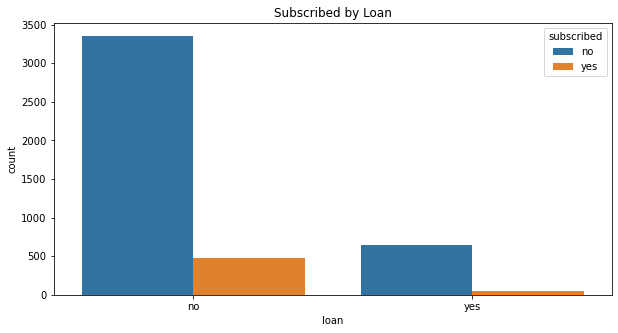

In [28]:
#Subscribed by Loan

plt.figure(figsize = (10,5))
plt.title('Subscribed by Loan')
sns.countplot(x = "loan", data = data, hue = "subscribed")

Customers without any loan subscribed more compared to those with loan

<AxesSubplot:title={'center':'Subscribed by Housing'}, xlabel='housing', ylabel='count'>

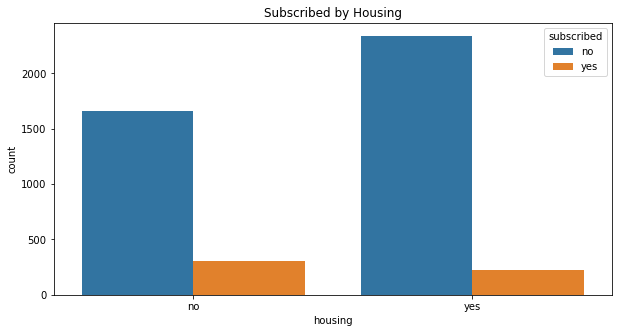

In [29]:
#Subscribed by Housing

plt.figure(figsize = (10,5))
plt.title('Subscribed by Housing')
sns.countplot(x = "housing", data = data, hue = "subscribed")

Customers without housing loan subscribed more compared to those with housing loan

<AxesSubplot:title={'center':'Subscribed by Contact'}, xlabel='contact', ylabel='count'>

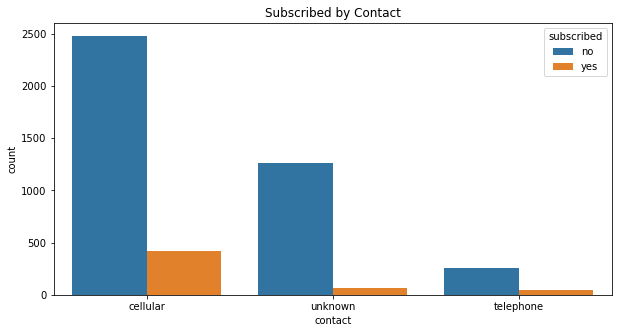

In [30]:
#Subscribed by Contact

plt.figure(figsize = (10,5))
plt.title('Subscribed by Contact')
sns.countplot(x = "contact", data = data, hue = "subscribed")

Customers with cellular contact subscribed more compared to those with other contact means

<BarContainer object of 4521 artists>

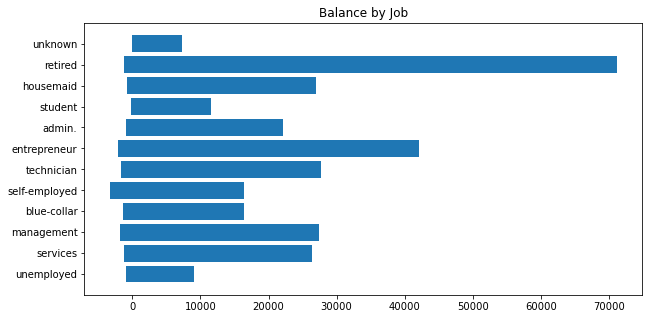

In [31]:
#Balance by Job

plt.figure(figsize = (10,5))
plt.title('Balance by Job')
plt.barh(width = "balance", y = "job", data = data)

From the balance, it shows that 'retired' customers had more balance, but logistically is this true? Let's see next chart for confirmation.

<AxesSubplot:title={'center':'Balance by Job'}, xlabel='job', ylabel='balance'>

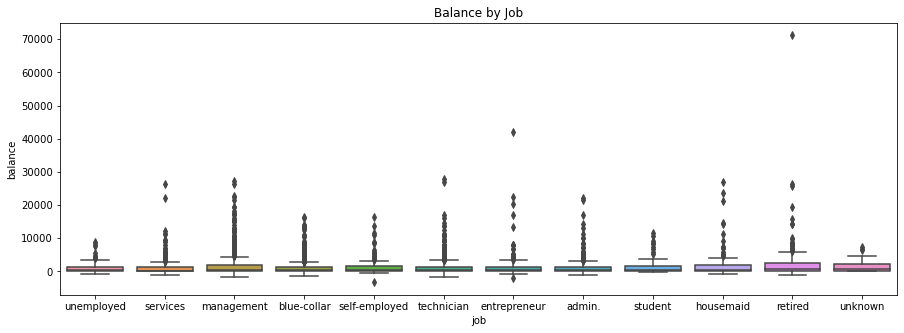

In [32]:
#Balance by Job

plt.figure(figsize = (15,5))
plt.title('Balance by Job')
sns.boxplot(x = "job", y = "balance", data = data)

With reference to the previous chart, we can see why 'retired' customer had highest balance, there's an outlier of over 70000, nevertheless, the size of box still shows that they have higher balance

<AxesSubplot:title={'center':'Balance by Education'}, xlabel='education', ylabel='balance'>

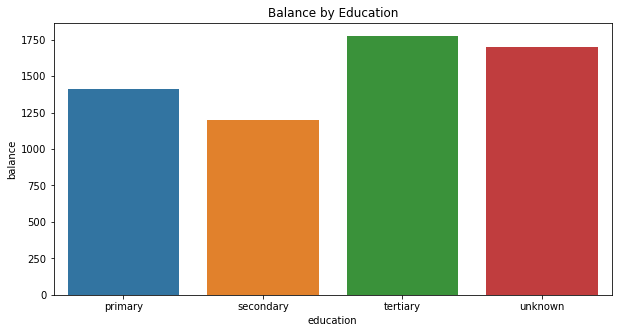

In [33]:
#Balance by Education

plt.figure(figsize = (10,5))
plt.title('Balance by Education')
sns.barplot(x = "education", y = "balance", data = data, ci =None)

From the balance, it shows that customers with tertiary education level had more balance compared to others



## Multivariate Analysis

Create charts where you plot more than two variables at a time on a chart. 

You can use visuals like bar charts, scatter plots and so on.

> Explore how to use the `hue` parameter in `seaborn` chart types

> **Make sure to put an explanation or interpretation of the chart in a markdown cell after the chart**

Text(0.5, 1.0, 'Subscribed by Age per Education Level')

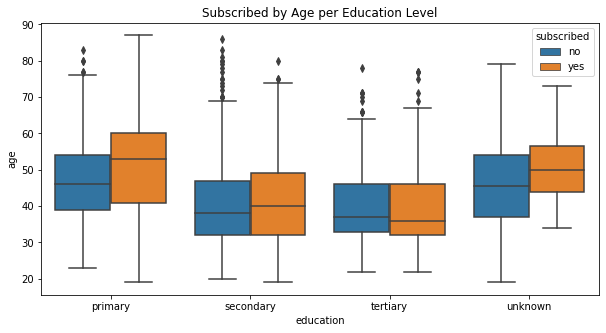

In [34]:
# Subscribed by Age per Education
plt.figure(figsize=(10,5))
sns.boxplot(x="education", y="age", hue="subscribed", data=data)
plt.title('Subscribed by Age per Education Level')

Primary education level customers with age ranging from 20-87 years subscribed to the term deposit package, which indicated highest, without outliers

[Text(0.5, 1.0, 'Subscribed by Balance per Education Level')]

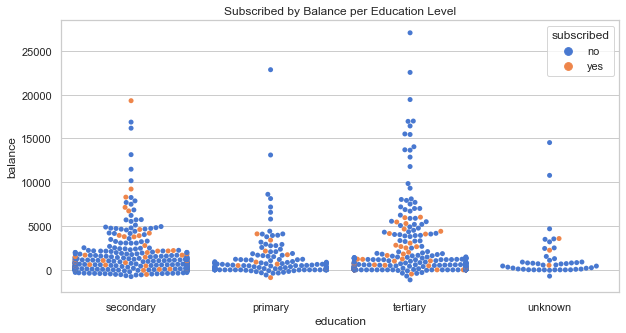

In [35]:
# Subscribed by Balance per Education using a subset of the data(1000)
plt.figure(figsize=(10,5))
sns.set_theme(style="whitegrid", palette="muted")
ax = sns.swarmplot(data=data.sample(1000), x="education", y="balance", hue="subscribed")
ax.set(ylabel="balance")
ax.set(title="Subscribed by Balance per Education Level")

Most of the customers that subscribed had balance ranging from 0-5000 and are secondary education level, which had the highest subscribers generally.

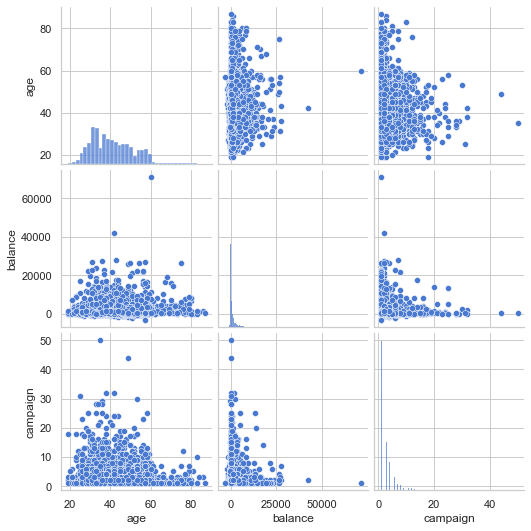

In [36]:
# Relationship between the numerical data
sns.pairplot(data)

<AxesSubplot:>

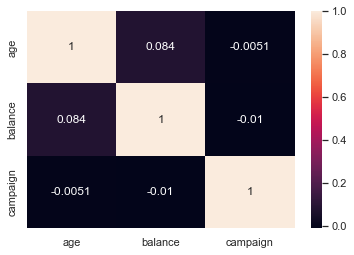

In [37]:
sns.heatmap(data.corr(),annot=True)

There is no relationship between the dataset. All values are independent

# Summary of Findings

1. About 88.5% of the customers didn't subscribe to the term deposit, only 11.5% Subscribed.
2. In the 11.5%, Age '38-48', Job 'management', Martial status 'married', Housing 'no loan', Loan 'no loan', Education 'secondary', Balance '>15k', Contact 'cellular' were the categories of Customers that subscribed.
3. There's no relationship between the numeric values

# Modelling

In this section, models will be trained and evaluated 


### Select Features

#### One-Hot Encoding

With one-hot encoding, we convert categorical data into numerical.

Each value of a column is pivoted into a column of it's own. The values in this new column will be either 1 or 0 to show whether that value exists or not.


First, replace some values to something you can more easily understand

* replace no with 0
* replace yes with 1

In [38]:
#replacing values in the target column(subscribed)

data['subscribed'].replace('no',0, inplace=True)
data['subscribed'].replace('yes',1, inplace=True)

In [39]:
#First, create a list of the categorical data(c)

c_data = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'day', 'month', 'duration',
          'pdays', 'previous', 'poutcome']


In [40]:
# Convert all categorical column to numeric using pd.get_dummies()

c_data_dummies = pd.get_dummies(data[c_data])
c_data_dummies.head(2)

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,previous_4,previous_5,previous_6,previous_7,previous_8,previous_9,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0


In [41]:
#join the encoded variables back to the main dataframe using pd.concat()
#pass both data and c_data_dummies as a list of their names

data = pd.concat([data, c_data_dummies], axis=1)

#view of what is done
print(data.shape)
data.head(2)

(4521, 1285)


,age,job,marital,education,default,balance,housing,loan,contact,day,...,previous_4,previous_5,previous_6,previous_7,previous_8,previous_9,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,30,unemployed,married,primary,no,1787,no,no,cellular,19,...,0,0,0,0,0,0,0,0,0,1
2,33,services,married,secondary,no,4789,yes,yes,cellular,11,...,1,0,0,0,0,0,1,0,0,0


In [42]:
#remove the initial categorical columns now that we have encoded them
#use the list called c_data do delete all the initially selected columns at once

data = data.drop(c_data, axis = 1)

In [43]:
data = data.drop(['age_group', 'balance_group'], axis = 1)

In [44]:
print(data.shape)
data.head(2)

(4521, 1270)


,age,balance,campaign,subscribed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,previous_4,previous_5,previous_6,previous_7,previous_8,previous_9,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,30,1787,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,33,4789,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


### Select Target

In [45]:
#target:
y = data['subscribed']
X = data.drop('subscribed', axis=1)

In [46]:
X.head(2) 

,age,balance,campaign,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,...,previous_4,previous_5,previous_6,previous_7,previous_8,previous_9,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
1,30,1787,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,33,4789,1,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0


In [47]:
y.head(2)

1    0
2    0
Name: subscribed, dtype: int64

#### Scaling data
scaling of the data makes it easy for a model to learn and understand the problem, it also leads to more accurate results.

In [48]:
# Import Standard Scaler

from sklearn.preprocessing import StandardScaler

In [49]:
#data scaling steps for train data set
scaler = StandardScaler()
X_train_scaled  =scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train_scaled, index=X_train.index, columns = X_train.columns)

NameError: name 'X_train' is not defined

In [ ]:
#data scaling test for test dataset
X_test_scaled = scaler.transform(X_test)
X_test = pd.DataFrame(X_test_scaled, index=X_test.index, columns = X_test.columns)

## Train Test Split

In [ ]:
# use train_test_split to divide the dataset into train and test datasets with proportion of 70:30
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30)

## Import ML algorithms and initialize them

In [ ]:
# Import ML Algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Import ML Metrics
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix

In [ ]:
# Initialize algorithms RandomForestClassifier

RF = RandomForestClassifier()

In [ ]:
# Initialize algorithms KNeighborsClassifier

KN = KNeighborsClassifier()

In [ ]:
# Initialize algorithms LogisticRegression
LR = LogisticRegression()

In [ ]:
# Initialize algorithms DecisionTreeClassifier
DT = DecisionTreeClassifier()

In [ ]:
classifiers = [RF,KN,LR,DT]

## Train and Test the models

In [ ]:
# Create a function to train and evaluate model
def trainer(model,X_train,y_train,X_test,y_test):
    #fit the model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    # print evaluation metrics
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(prediction,y_test)) 

In [ ]:
# loop through all models
for model in classifiers:
    trainer(model,X_train,y_train,X_test,y_test)

In [ ]:
# Calculate the confusion matrix for RandomForestClassifier

conf_matrix = confusion_matrix(y_true=y_test, y_pred=RF.predict(X_test))

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[1]):
    for j in range(conf_matrix.shape[0]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('RandomForest Confusion Matrix', fontsize=18)
plt.show()

print('Precision: %.3f' % precision_score(y_test, RF.predict(X_test)))
print('Recall: %.3f' % recall_score(y_test, RF.predict(X_test)))

In [ ]:
# Calculate the confusion matrix for KNeighborClassifier

conf_matrix = confusion_matrix(y_true=y_test, y_pred=KN.predict(X_test))

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[1]):
    for j in range(conf_matrix.shape[0]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title(' KNeighbor Confusion Matrix', fontsize=18)
plt.show()

print('Precision: %.3f' % precision_score(y_test, KN.predict(X_test)))
print('Recall: %.3f' % recall_score(y_test, KN.predict(X_test)))

In [ ]:
# Calculate the confusion matrix for LogisticsRegressionClassifier

conf_matrix = confusion_matrix(y_true=y_test, y_pred=LR.predict(X_test))

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[1]):
    for j in range(conf_matrix.shape[0]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('LogisticsRegression Confusion Matrix', fontsize=18)
plt.show()

print('Precision: %.3f' % precision_score(y_test, LR.predict(X_test)))
print('Recall: %.3f' % recall_score(y_test, LR.predict(X_test)))

In [ ]:
# Calculate the confusion matrix for DecisionTreeClassifier

conf_matrix = confusion_matrix(y_true=y_test, y_pred=DT.predict(X_test))

# Print the confusion matrix using Matplotlib

fig, ax = plt.subplots(figsize=(7, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[1]):
    for j in range(conf_matrix.shape[0]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
        
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('DecisionTree Confusion Matrix', fontsize=18)
plt.show()

print('Precision: %.3f' % precision_score(y_test, DT.predict(X_test)))
print('Recall: %.3f' % recall_score(y_test, DT.predict(X_test)))

## Interpret Results



* RandomForest: This model had accuracy score of 87%, precision score of 71% and recall score of 12%
* KNeighbor: This model had accuracy score of 86%, precision score of 14% and recall score of 1%
* LogisticRegression: This model had accuracy score of 88%, precision score of 73% and recall score of 17%
* DecisionTree: This model had accuracy score of 85%, precision score of 40% and recall score of 25%


The purpose of this project is to predict whether a customer will subscribe for a term deposit or not. The best model that predicts with lesser error is to be chosen, subjecting them to the different evaluation metrics (accuracy, precision and recall). The confusion matrix displays the error value for each model in terms of False Positive (Where the model predicts a customer to subscribe to the term when they actually didn't subscribe - Precision) and False Negative (Where the model predicts a customer not to subscribe to the term when they actually did subscribe - Recall). 

## Summary

Model to deploy for production

LogisticRegression: For this business problem, Precision score is of more relevancy than Recall score. Hence, LogisticRegression has higher precision score and accuracy score compared to other models stated above.